# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [2]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
spaceship.shape

(8693, 14)

In [5]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [6]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
spaceship_dropped = spaceship.dropna()
spaceship_dropped.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [8]:
#Cabin is too granular quiero obtener solo la letra como columna nueva
spaceship['Cabin_letter'] = spaceship['Cabin'].str[0]
spaceship[['Cabin', 'Cabin_letter']].head()
spaceship['Cabin_letter'].value_counts()
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_letter
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F


In [9]:
spaceship = spaceship.drop(columns=['PassengerId', 'Name'])
spaceship.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_letter
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F


In [10]:
spaceship = spaceship.drop(columns=['Cabin'])
spaceship.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_letter
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F


In [11]:
# Crear variables dummy para todas las columnas no numéricas
spaceship = pd.get_dummies(spaceship, drop_first=True)

# Revisar las primeras filas
spaceship.head()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_G,Cabin_letter_T
0,39.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,True,False,True,False,False,False,False,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,True,False,False,False,False,False,True,False,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,True,True,False,False,False,False,False,False,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,True,False,False,False,False,False,True,False,False


In [12]:
spaceship.isnull().sum()

Age                          179
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Transported                    0
HomePlanet_Europa              0
HomePlanet_Mars                0
CryoSleep_True                 0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
VIP_True                       0
Cabin_letter_B                 0
Cabin_letter_C                 0
Cabin_letter_D                 0
Cabin_letter_E                 0
Cabin_letter_F                 0
Cabin_letter_G                 0
Cabin_letter_T                 0
dtype: int64

In [13]:
# RELLENAR los nulos de las columnas numéricas que quedaron
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# 1. Es VITAL escalar los datos antes de usar KNNImputer. 
# Si no, las columnas con números grandes (como Spa) dominarán la distancia.
scaler = StandardScaler()
spaceship_scaled = scaler.fit_transform(spaceship)

# 2. Configuramos el imputador (por defecto busca 5 vecinos)
imputer = KNNImputer(n_neighbors=5)

# 3. Rellenamos los huecos
# Esto devuelve un array de numpy, así que lo convertimos de nuevo a DataFrame
spaceship_imputed = imputer.fit_transform(spaceship_scaled)
spaceship_final = pd.DataFrame(spaceship_imputed, columns=spaceship.columns)
print(f"Nulos restantes: {spaceship_final.isnull().sum().sum()}")

Nulos restantes: 0


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [14]:
#your code here
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# 1️⃣ Escalado de spaceship_final
scaler_final = StandardScaler()
X_scaled = scaler_final.fit_transform(spaceship_final.drop(columns=['Transported']))

# 2️⃣ Separar variable objetivo
y = spaceship_final['Transported'].astype(int)

# 3️⃣ Feature Selection usando RandomForest
selector = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median"  # selecciona las features más importantes
)

selector.fit(X_scaled, y)

X_selected = selector.transform(X_scaled)

print(f"Número de features originales: {X_scaled.shape[1]}")
print(f"Número de features seleccionadas: {X_selected.shape[1]}")


Número de features originales: 19
Número de features seleccionadas: 10


In [15]:
# Si tu variable Transported es True/False o -1/0, convertirla a 0/1
y = spaceship['Transported'].astype(int)  # True->1, False->0


**Perform Train Test Split**

In [16]:
#your code here
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected,       # tus features seleccionadas
    y,                # variable objetivo
    test_size=0.2,    # 20% test
    random_state=42   # para reproducibilidad
)

# Revisar tamaños
print("🎯 Tamaño de los conjuntos de entrenamiento y prueba:")
print("-" * 50)
print(f"X_train: {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test : {y_test.shape}")
print("-" * 50)


🎯 Tamaño de los conjuntos de entrenamiento y prueba:
--------------------------------------------------
X_train: (6954, 10)
X_test : (1739, 10)
y_train: (6954,)
y_test : (1739,)
--------------------------------------------------


In [17]:
# Arbol de decision
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inicializar árbol de decisión
dt = DecisionTreeClassifier(
    max_depth=None,       # profundidad máxima del árbol (None → hasta que todas las hojas sean puras)
    min_samples_split=2,  # mínimo de muestras para dividir un nodo
    random_state=42
)

In [18]:
# Entrenar el modelo
dt.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [19]:
# Predecir el sobre el conjunto de prueba
y_pred_dt = dt.predict(X_test)

In [20]:
# Evaluar el modelo
print("🏆 Decision Tree Classifier")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("📊 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_dt))
print("\n📄 Reporte de Clasificación:")
print(classification_report(y_test, y_pred_dt))
print("-" * 50)


🏆 Decision Tree Classifier
--------------------------------------------------
Accuracy: 0.7366
📊 Matriz de Confusión:
[[588 273]
 [185 693]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       861
           1       0.72      0.79      0.75       878

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739

--------------------------------------------------


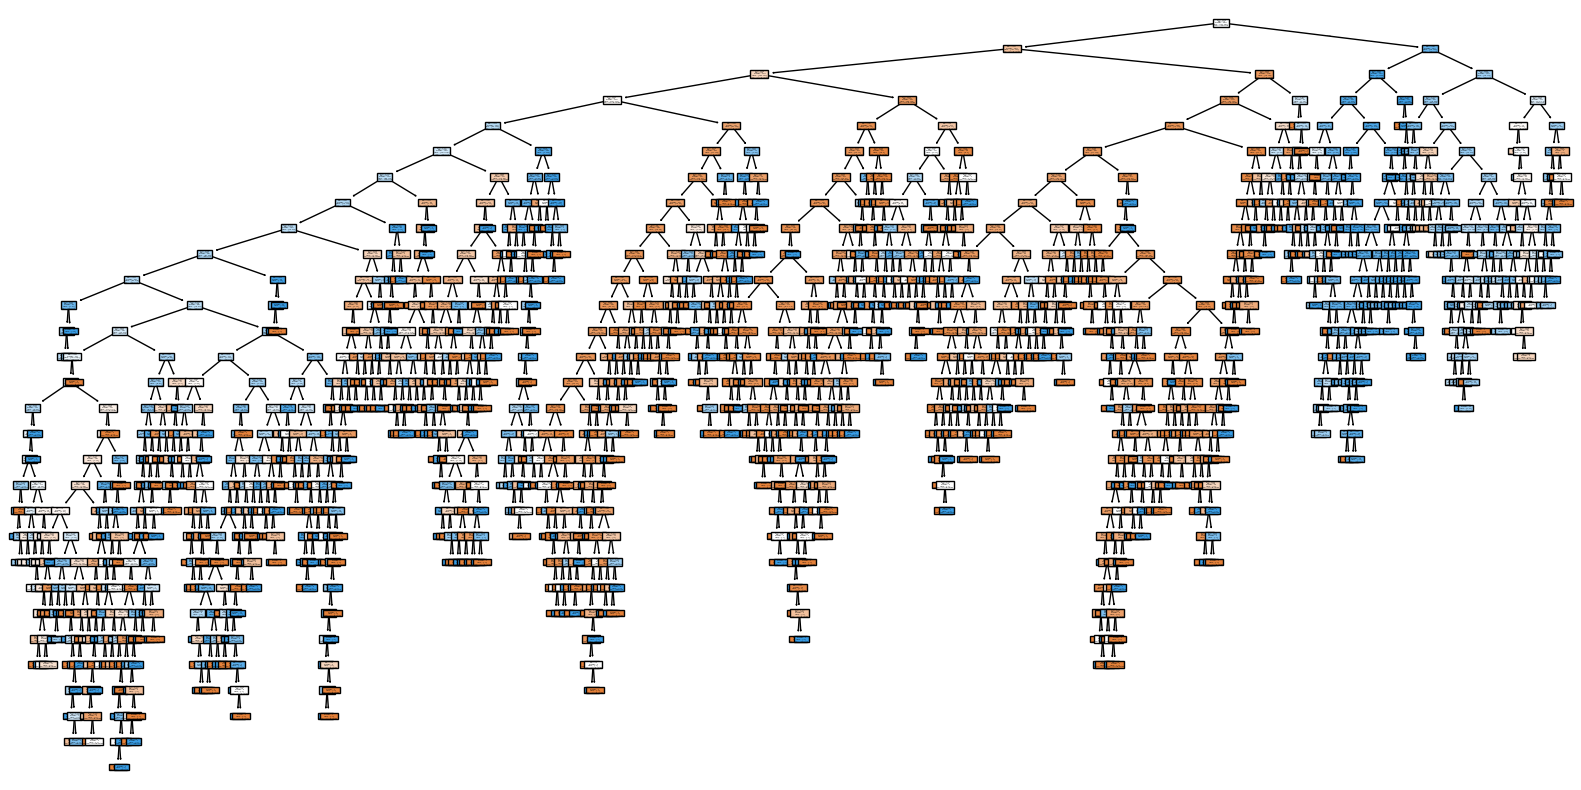

In [21]:
# Visualizar el arbol
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=[f"F{i}" for i in range(X_selected.shape[1])], 
          class_names=["Not Transported","Transported"], filled=True)
plt.show()


**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --------------------------
# Bagging (con reemplazo) - versión moderna
# --------------------------
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # antes era base_estimator
    n_estimators=100,
    max_samples=0.8,
    bootstrap=True,  # True → Bagging
    random_state=42
)

# Entrenar
bagging.fit(X_train, y_train)

# Predecir
y_pred_bag = bagging.predict(X_test)

# Evaluar
print("🏆 Bagging Classifier (con reemplazo)")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_bag):.4f}")
print("📊 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_bag))
print("\n📄 Reporte de Clasificación:")
print(classification_report(y_test, y_pred_bag))
print("-" * 50)


🏆 Bagging Classifier (con reemplazo)
--------------------------------------------------
Accuracy: 0.7832
📊 Matriz de Confusión:
[[660 201]
 [176 702]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       861
           1       0.78      0.80      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

--------------------------------------------------


In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --------------------------
# Pasting (sin reemplazo)
# --------------------------
pasting = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # <--- cambiar base_estimator por estimator
    n_estimators=100,
    max_samples=0.8,
    bootstrap=False,  # False → Pasting
    random_state=42
)

# Entrenar
pasting.fit(X_train, y_train)

# Predecir
y_pred_paste = pasting.predict(X_test)

# Evaluar
print("🏆 Pasting Classifier (sin reemplazo)")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_paste):.4f}")
print("📊 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_paste))
print("\n📄 Reporte de Clasificación:")
print(classification_report(y_test, y_pred_paste))
print("-" * 50)


🏆 Pasting Classifier (sin reemplazo)
--------------------------------------------------
Accuracy: 0.7723
📊 Matriz de Confusión:
[[645 216]
 [180 698]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       861
           1       0.76      0.79      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

--------------------------------------------------


- Random Forests

In [24]:
#your code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inicializar el modelo
rf = RandomForestClassifier(
    n_estimators=200,       # número de árboles
    max_depth=None,         # sin límite de profundidad
    min_samples_split=2,    # mínimo de muestras para dividir
    min_samples_leaf=1,     # mínimo de muestras en hoja
    random_state=42,
    n_jobs=-1               # usa todos los núcleos
)

# Entrenar
rf.fit(X_train, y_train)

# Predecir
y_pred_rf = rf.predict(X_test)

# Evaluar
print("🏆 Random Forest Classifier")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("📊 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("\n📄 Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))
print("-" * 50)


🏆 Random Forest Classifier
--------------------------------------------------
Accuracy: 0.7867
📊 Matriz de Confusión:
[[664 197]
 [174 704]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       861
           1       0.78      0.80      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

--------------------------------------------------


- Gradient Boosting

In [25]:
#your code here
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inicializar el modelo
gb = GradientBoostingClassifier(
    n_estimators=200,      # número de árboles
    learning_rate=0.1,     # cuánto corrige cada árbol
    max_depth=3,           # profundidad de cada árbol
    random_state=42
)

# Entrenar
gb.fit(X_train, y_train)

# Predecir
y_pred_gb = gb.predict(X_test)

# Evaluar
print("🏆 Gradient Boosting Classifier")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print("📊 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_gb))
print("\n📄 Reporte de Clasificación:")
print(classification_report(y_test, y_pred_gb))
print("-" * 50)


🏆 Gradient Boosting Classifier
--------------------------------------------------
Accuracy: 0.7913
📊 Matriz de Confusión:
[[631 230]
 [133 745]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       861
           1       0.76      0.85      0.80       878

    accuracy                           0.79      1739
   macro avg       0.80      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

--------------------------------------------------


- Adaptive Boosting

In [26]:
#your code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inicializar el modelo (versión moderna)
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # <--- cambiar base_estimator por estimator
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

# Entrenar
adaboost.fit(X_train, y_train)

# Predecir
y_pred_ab = adaboost.predict(X_test)

# Evaluar
print("🏆 AdaBoost Classifier")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_ab):.4f}")
print("📊 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_ab))
print("\n📄 Reporte de Clasificación:")
print(classification_report(y_test, y_pred_ab))
print("-" * 50)


🏆 AdaBoost Classifier
--------------------------------------------------
Accuracy: 0.7625
📊 Matriz de Confusión:
[[684 177]
 [236 642]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       861
           1       0.78      0.73      0.76       878

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739

--------------------------------------------------


Which model is the best and why?

In [27]:
#comment here
from sklearn.metrics import accuracy_score, f1_score

models = {
    "Decision Tree": y_pred_dt,
    "Bagging": y_pred_bag,
    "Pasting": y_pred_paste,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "AdaBoost": y_pred_ab
}

for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)  # ahora funciona porque las etiquetas son 0/1
    print(f"{name}: Accuracy={acc:.4f}, F1-score={f1:.4f}")



Decision Tree: Accuracy=0.7366, F1-score=0.7516
Bagging: Accuracy=0.7832, F1-score=0.7883
Pasting: Accuracy=0.7723, F1-score=0.7790
Random Forest: Accuracy=0.7867, F1-score=0.7915
Gradient Boosting: Accuracy=0.7913, F1-score=0.8041
AdaBoost: Accuracy=0.7625, F1-score=0.7566


Gradient Boosting es el mejor modelo para este caso, corrige errores secuenciales, es decir, mejor desempeño global.